In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Тунеллирование при ПВО, измерение $R(z), T(z)$

In [2]:
df = pd.DataFrame({
                    't_uA':[10.0, 9.3, 8.7, 7.8, 7.3, 6.8, 6.3, 5.6, 4.9, 4.3, 3.9, 3.4, 2.9, 2.4, 1.9, 1.5, 1.0],
                    'r_uA':[0.1, 0.8, 1.3, 2.1, 2.6, 3.1, 3.5, 3.9, 4.3, 4.9, 5.3, 5.8, 6.2, 6.7, 7.1, 7.9, 9.0],
                   'mm_raw':[6.45, 6.9, 7.08, 7.41, 7.54, 7.74, 7.86, 8.04, 8.22, 8.41, 8.55, 8.76, 8.97, 9.25, 9.53, 10.14, 11.34]})
df['mm'] = df['mm_raw'] - df['mm_raw'].iloc[0]


df['r_uA'] = df['r_uA'] / 10.0
df['t_uA'] = df['t_uA'] / 10.0
df['sum'] = df['t_uA'] + df['r_uA']

(0.25, 0.75)

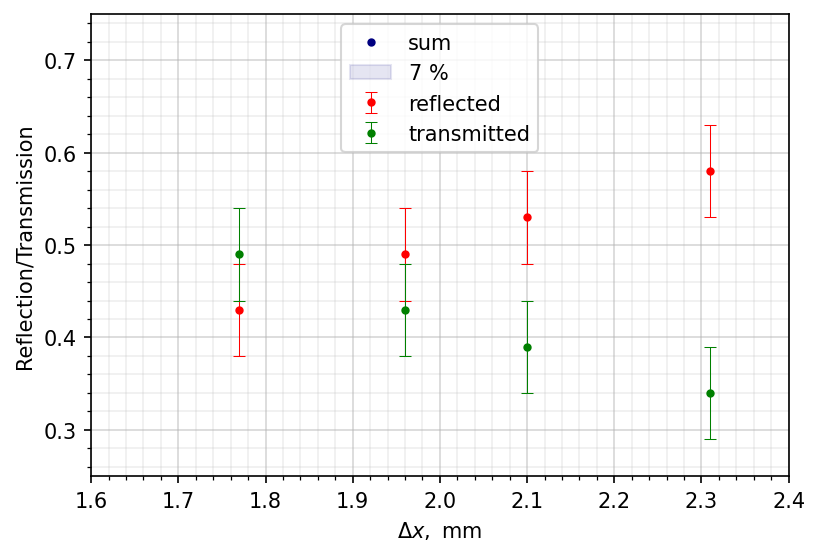

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches((6,4))
fig.set_dpi(150)


ax.errorbar(
    x=df['mm'],
    y=df['r_uA'],
    # xerr=np.full(shape=(len(df['mm']),), fill_value=0.02),
    yerr=np.full(shape=(len(df['mm']),), fill_value=0.05),
    linestyle='',
    linewidth=.5,   
    capsize=3,
    capthick=.5,
    markersize=3,
    marker='o',
    color='red',
    label='reflected' 
)



ax.errorbar(
    x=df['mm'],
    y=df['t_uA'],
    # xerr=np.full(shape=(len(df['mm']),), fill_value=0.02),
    yerr=np.full(shape=(len(df['mm']),), fill_value=0.05),
    linestyle='',
    linewidth=.5,   
    capsize=3,
    capthick=.5,
    markersize=3,
    marker='o',
    color='green',
    label='transmitted'
)

ax.plot(
    df['mm'], 
    df['sum'], 
    marker='o',               # Маркеры для точек
    linestyle='-',            # Стиль линии
    linewidth =0,              # Толщина линии
    color='navy',             # Цвет линии
    markersize=3,             # Размер маркеров
    label='sum'            # Подпись для легенды
)

ax.set_xlabel(r'$\Delta x,~\mathrm{mm}$')
ax.set_ylabel(r'Reflection/Transmission')
ax.fill_between(df['mm'], np.ones(len(df))*1.07, np.ones(len(df))*.93, color='navy', alpha=0.1, label=r'$7~\%$')

ax.grid(True, 'major', alpha=0.5)
ax.grid(True, 'minor', alpha=0.2)
ax.minorticks_on()

ax.legend()
ax.set_xlim(1.6, 2.4)
ax.set_ylim(0.25, .75)

(array([-0.46743143,  0.12249844]), array([0.03102421, 0.03774864]))

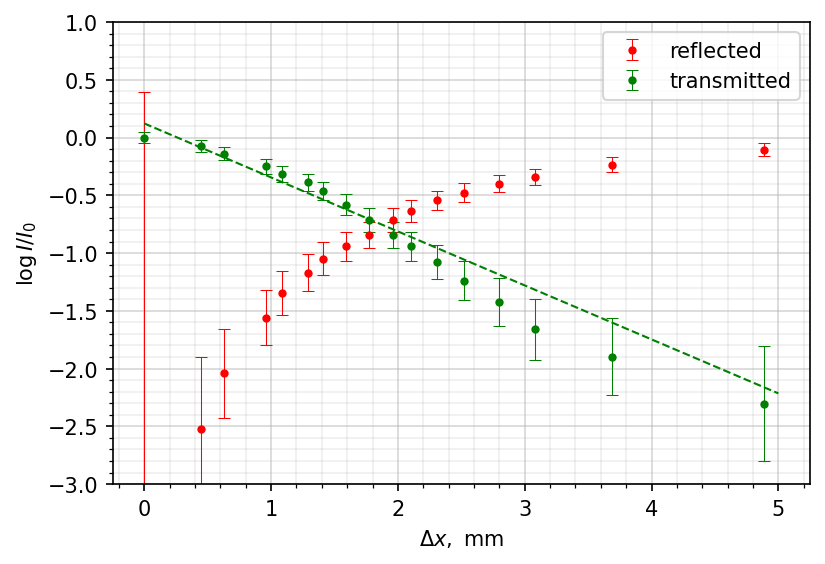

In [55]:
tlnerr = np.full(shape=(len(df['mm']),), fill_value=0.05)/df['t_uA']
rlnerr = np.full(shape=(len(df['mm']),), fill_value=0.05)/df['r_uA']

fig, ax = plt.subplots()
fig.set_size_inches((6,4))
fig.set_dpi(150)


ax.errorbar(
    x=df['mm'],
    y=np.log(df['r_uA']),
    # xerr=np.full(shape=(len(df['mm']),), fill_value=0.02),
    yerr=rlnerr,
    linestyle='',
    linewidth=.5,   
    capsize=3,
    capthick=.5,
    markersize=3,
    marker='o',
    color='red',
    label='reflected' 
)



ax.errorbar(
    x=df['mm'],
    y=np.log(df['t_uA']),
    # xerr=np.full(shape=(len(df['mm']),), fill_value=0.02),
    yerr=tlnerr,
    linestyle='',
    linewidth=.5,   
    capsize=3,
    capthick=.5,
    markersize=3,
    marker='o',
    color='green',
    label='transmitted'
)

ax.grid(True, 'major', alpha=0.5)
ax.grid(True, 'minor', alpha=0.2)
ax.minorticks_on()

ax.set_ylim(-3, 1)

curve = lambda x, k ,b : k*x + b
popt, pcov = curve_fit(curve, df['mm'], np.log(df['t_uA']), sigma=tlnerr)


ls = np.array((0, 5))
ax.plot(ls, curve(ls, popt[0], popt[1]),
        linestyle='--',
        linewidth=1,
        color='green')
# ax.plot(ls, -2+ls/1.85,
#         linestyle='--',
#         linewidth=1,
#         color='red')


ax.legend()

ax.set_xlabel(r'$\Delta x,~\mathrm{mm}$')
ax.set_ylabel(r'$\log{I/I_0}$')
popt, np.sqrt(np.diag(pcov))


# Интерферометрия Майкельсона

In [4]:
df_interference = pd.DataFrame({'mm_raw':
                              [0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00,
                              4.25, 4.50, 4.75, 5.00, 5.25, 5.50, 5.75, 6.00, 6.25, 6.50, 6.75, 7.00, 7.25, 7.50, 7.75, 8.00, 
                              8.25, 8.50, 8.75, 9.00, 9.25, 9.5, 9.75, 10.00, 10.25, 10.50, 10.75, 11.00, 11.25, 11.50, 11.75, 12.00,
                              12.25, 12.50, 12.75, 13.00, 13.25, 13.50, 13.75, 14.00, 14.25, 14.50],
                               'uA':
                              [6.4, 6.6, 7.5, 8.2, 8.9, 9.2, 9.5, 9.4, 8.6, 7.1, 4.4, 2.5, 0.9, 1.1, 2.8, 4.3, 6.0,
                              6.8, 7.2, 7.7, 8.7, 9.1, 9.6, 9.7, 9.6, 8.8, 6.9, 4.5, 1.4, 0.7, 2.2, 3.9, 5.0, 
                              5.6, 7.0, 7.8, 8.3, 8.6, 9.0, 9.2, 9.5, 9.1, 8.3, 6.7, 3.8, 1.4, 0.6, 2.0, 4.3,
                              5.3, 5.9, 6.2, 7.3, 8.1, 9.0, 9.4, 9.5, 9.3, 8.7]})

df_interference['mm'] = df_interference['mm_raw'] - df_interference['mm_raw'].iloc[0]
df_interference

,mm_raw,uA,mm
0,0.00,6.4,0.00
1,0.25,6.6,0.25
2,0.50,7.5,0.50
3,0.75,8.2,0.75
4,1.00,8.9,1.00
5,1.25,9.2,1.25
6,1.50,9.5,1.50
7,1.75,9.4,1.75
8,2.00,8.6,2.00
9,2.25,7.1,2.25


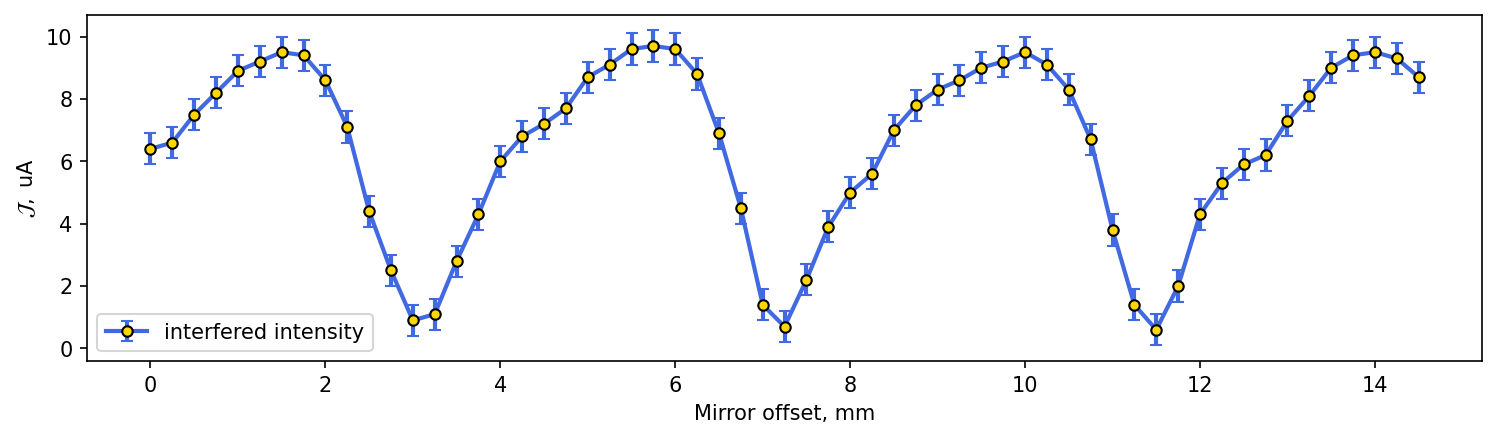

In [139]:
fig, ax = plt.subplots(figsize=(12,3))
fig.set_dpi(150)

curve = lambda x, f, A, d, B: A*np.sin(f*x + d) + B

# popt, pcov = curve_fit(curve, df_interference['mm'], df_interference['uA'],p0=(1.5, 3.5, 0, 5))
# popt = [1.5, 3.5, 0, -1, 5.5, .3]

offset = 4.20

ax.errorbar(
    df_interference['mm'], 
    df_interference['uA'], 
    yerr=np.full(len(df_interference), 0.5),
    capsize=3,
    marker='o',               # Маркеры для точек
    linestyle='-',            # Стиль линии
    linewidth=2,              # Толщина линии
    color='royalblue',        # Цвет линии
    markersize=5,             # Размер маркеров
    markerfacecolor='gold',   # Цвет маркеров
    markeredgecolor='black',  # Цвет границы маркеров
    label='interfered intensity'            # Подпись для легенды
)

ax.set_xlabel('Mirror offset, mm')
ax.set_ylabel(r'$\mathcal{J},~\mathrm{uA}$')

ax.legend()


4.0 157.70666666666665
4.01 150.62000000000012
4.02 143.44800000000026
4.03 136.27466666666646
4.04 128.9853333333333
4.05 121.68000000000012
4.06 114.20933333333362
4.07 106.68533333333312
4.08 99.52266666666661
4.09 92.82800000000007
4.1 86.64666666666689
4.11 80.61333333333314
4.12 74.65333333333326
4.13 68.90800000000007
4.14 63.357333333333514
4.15 58.43333333333316
4.16 53.634666666666604
4.17 49.43466666666671
4.18 46.34000000000007
4.1899999999999995 44.34000000000009
4.2 43.46666666666667
4.21 43.81066666666667
4.22 45.40266666666661
4.2299999999999995 49.019999999999754
4.24 54.66000000000013
4.25 61.093333333333334
4.26 68.2266666666665
4.27 75.785333333333
4.279999999999999 83.65466666666612
4.29 91.83066666666667
4.3 100.02666666666651


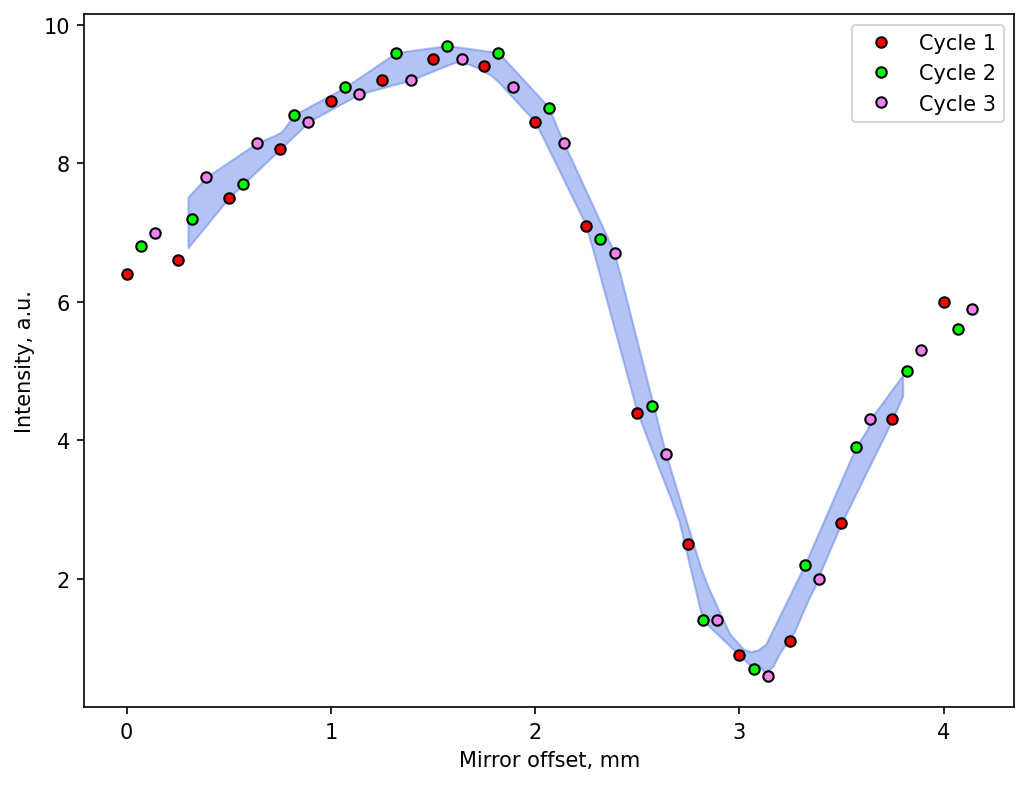

In [141]:
fig, ax = plt.subplots(figsize=(8,6))
fig.set_dpi(150)

offset = 4.18

ax.plot(
    df_interference['mm'][:17], 
    df_interference['uA'][:17], 
    marker='o',               # Маркеры для точек
    linestyle='',            # Стиль линии
    linewidth=2,              # Толщина линии
    color='royalblue',        # Цвет линии
    markersize=5,             # Размер маркеров
    markerfacecolor='red',   # Цвет маркеров
    markeredgecolor='black',  # Цвет границы маркеров
    label='Cycle 1'            # Подпись для легенды
)

ax.plot(
    df_interference['mm'][17:34]-offset*1, 
    df_interference['uA'][17:34], 
    marker='o',               # Маркеры для точек
    linestyle='',            # Стиль линии
    linewidth=2,              # Толщина линии
    color='royalblue',        # Цвет линии
    markersize=5,             # Размер маркеров
    markerfacecolor='lime',   # Цвет маркеров
    markeredgecolor='black',  # Цвет границы маркеров
    label='Cycle 2'            # Подпись для легенды
)

ax.plot(
    df_interference['mm'][34:51]-offset*2, 
    df_interference['uA'][34:51], 
    marker='o',               # Маркеры для точек
    linestyle='',            # Стиль линии
    linewidth=2,              # Толщина линии
    color='royalblue',        # Цвет линии
    markersize=5,             # Размер маркеров
    markerfacecolor='violet',   # Цвет маркеров
    markeredgecolor='black',  # Цвет границы маркеров
    label='Cycle 3'            # Подпись для легенды
)


from scipy.interpolate import interp1d

int1 = interp1d(df_interference['mm'][:17], 
    df_interference['uA'][:17], kind='linear')
int2 = interp1d(df_interference['mm'][17:34]-offset, 
    df_interference['uA'][17:34], kind='linear')
int3 = interp1d(df_interference['mm'][34:51]-offset*2, 
    df_interference['uA'][34:51], kind='linear')

ls = np.linspace(0.3, 3.8, 100)

imax = np.max(np.vstack((int1(ls), int2(ls), int3(ls))), axis=0)
imin = np.min(np.vstack((int1(ls), int2(ls), int3(ls))), axis=0)

ax.fill_between(x=ls,
                y1=imin,
                y2=imax,
                color='royalblue',
                alpha=0.4)

offsets=np.linspace(4.00, 4.30, 31)
for off in offsets:
    int1 = interp1d(df_interference['mm'][:17], 
    df_interference['uA'][:17], kind='linear')
    int2 = interp1d(df_interference['mm'][17:34]-off, 
    df_interference['uA'][17:34], kind='linear')
    int3 = interp1d(df_interference['mm'][34:51]-off*2, 
    df_interference['uA'][34:51], kind='linear')

    ls = np.linspace(0.5, 3.8, 100)

    imax = np.max(np.vstack((int1(ls), int2(ls), int3(ls))), axis=0)
    imin = np.min(np.vstack((int1(ls), int2(ls), int3(ls))), axis=0)
    print(off, np.sum(imax-imin))

ax.set_xlabel('Mirror offset, mm')
ax.set_ylabel('Intensity, a.u.')
ax.legend()

$h = 6.2~\mathrm{mm}$

$h(n-1) \approx 3.1~\mathrm{mm}$

### Измерение 1
$l_1 = 1.76~\mathrm{mm}$ 

$\tilde{l_1} = 3.17~\mathrm{mm}$

$\Delta l_1 = 1.41~\mathrm{mm}$

### Измерение 2
$l_2 = 10.30~\mathrm{mm}$ 

$\tilde{l_2} = 11.64~\mathrm{mm}$

$\Delta l_2 = 1.34~\mathrm{mm}$

### Измерение 3
$l_3 = 6.00~\mathrm{mm}$ 

$\tilde{l_3} = 7.30~\mathrm{mm}$

$\Delta l_3 = 1.30~\mathrm{mm}$